In [2]:
import numpy as np
import cv2
import sys
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img= cv2.imread('./test images/tinadabi1.jpg')
img.shape

(228, 221, 3)

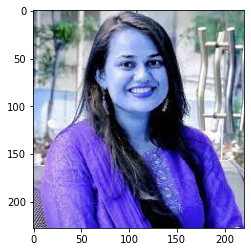

In [4]:
plt.imshow(img)

In [5]:
img1=img= cv2.imread('./test images/Passport_Photograph.jpeg')
img.shape

(528, 437, 3)

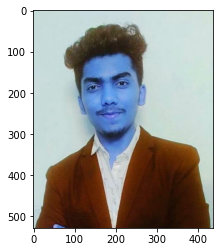

In [6]:
plt.imshow(img1)


In [7]:
gray=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray.shape

(528, 437)

In [8]:
gray


array([[217, 217, 217, ..., 222, 222, 222],
       [217, 217, 217, ..., 221, 221, 221],
       [217, 217, 217, ..., 220, 220, 220],
       ...,
       [211, 202, 224, ..., 187, 191, 193],
       [215, 208, 224, ..., 188, 191, 193],
       [218, 210, 215, ..., 188, 192, 193]], dtype=uint8)

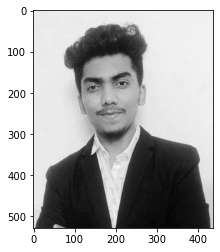

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ACER\\.anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ACER\\.anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray,1.1,5,)
faces


array([[ 82,  99, 203, 203]])

In [11]:
(x,y,w,h)=faces[0]
x,y,w,h


(82, 99, 203, 203)

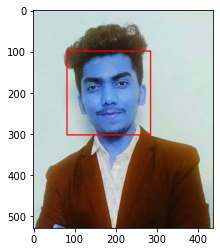

In [12]:
face_img=cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

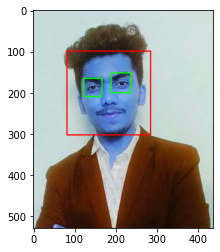

In [13]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img [y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh)in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

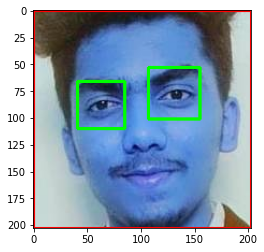

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

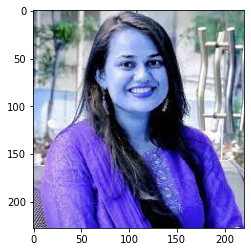

In [16]:
img2=cv2.imread('./test images/tinadabi1.jpg')
plt.imshow(img2)

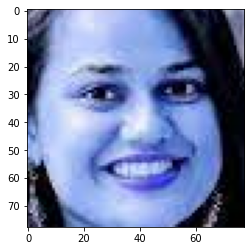

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test images/tinadabi1.jpg')
plt.imshow(cropped_image)

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"


In [19]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
{
    'lionel_messi':[
        './dataset/cropped/messi/messi1.png',
        './dataset/cropped/messi/messi2.png'
    ],
    'virat_kohli':[
        './dataset/cropped/kohli/kohli1.png',
        './dataset/cropped/kohli/kohli2.png'
    ],
    
}

{'lionel_messi': ['./dataset/cropped/messi/messi1.png',
  './dataset/cropped/messi/messi2.png'],
 'virat_kohli': ['./dataset/cropped/kohli/kohli1.png',
  './dataset/cropped/kohli/kohli2.png']}

In [23]:
cropped_image_dirs =[]
celebrity_file_name_dict ={}
for img_dir in img_dirs:
    count = 1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images to folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

cropped
lionel_messi
generating cropped images to folder:  ./dataset/cropped/lionel_messi
maria_sharapova
generating cropped images to folder:  ./dataset/cropped/maria_sharapova
roger_federer
generating cropped images to folder:  ./dataset/cropped/roger_federer
serena_williams
generating cropped images to folder:  ./dataset/cropped/serena_williams
virat_kohli
generating cropped images to folder:  ./dataset/cropped/virat_kohli


In [24]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #datatype conversion
    #convert to gray scale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coeffients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

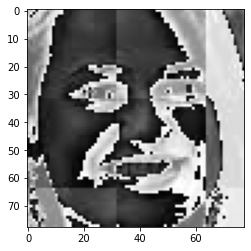

In [25]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
celebrity_file_name_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [27]:
class_dict ={}
count=0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]= count
    count =count+1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [29]:
len(X[0])


4096

In [30]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

In [32]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

In [34]:
len(X_test)

42

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.83      1.00      0.91        10
           3       0.83      0.62      0.71         8
           4       0.75      0.86      0.80         7
           5       1.00      0.89      0.94         9

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.85        42
weighted avg       0.86      0.86      0.85        42



In [36]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.778769,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.618462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.738769,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

0.5952380952380952

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8809523809523809

In [43]:
best_clf = best_estimators['svm']


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  6,  1,  0],
       [ 0,  0,  1,  6,  0],
       [ 0,  0,  0,  1,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

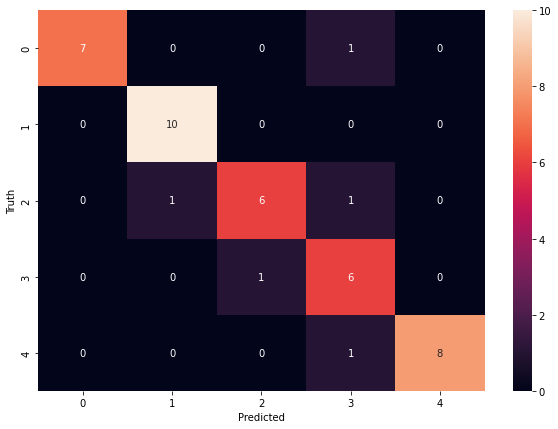

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [47]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))